# Test Score Prediction - PISA 2009

Shinto Theruvil Manuel

December 2016

## I. Definition
(1-2 pages)
### Project Overview

## II. Analysis 
(2-4 pages)
### Data Exploration

The datasets **pisa2009train.csv** and **pisa2009test.csv** contain information about the demographics
and schools for American students taking the exam, derived from 2009 PISA Public-Use Data Files
distributed by the United States National Center for Education Statistics (NCES). While the datasets
are not supposed to contain identifying information about students taking the test, by using the
data you are bound by the NCES data use agreement, which prohibits any attempt to determine
the identity of any student in the datasets.


#### Fields
The datasets have the following variables:
* **grade**: The grade in school of the student (most 15-year-olds in America are in 10th grade)
* **male**: Whether the student is male (1/0)
* **raceeth**: The race/ethnicity composite of the student
* **preschool**: Whether the student attended preschool (1/0)
* **expectBachelors**: Whether the student expects to obtain a bachelor's degree (1/0)
* **motherHS**: Whether the student's mother completed high school (1/0)
* **motherBachelors**: Whether the student's mother obtained a bachelor's degree (1/0)
* **motherWork**: Whether the student's mother has part-time or full-time work (1/0)
* **fatherHS**: Whether the student's father completed high school (1/0)
* **fatherBachelors**: Whether the student's father obtained a bachelor's degree (1/0)
* **fatherWork**: Whether the student's father has part-time or full-time work (1/0)
* **selfBornUS**: Whether the student was born in the United States of America (1/0)
* **motherBornUS**: Whether the student's mother was born in the United States of America (1/0)
* **fatherBornUS**: Whether the student's father was born in the United States of America (1/0)
* **englishAtHome**: Whether the student speaks English at home (1/0)
* **computerForSchoolwork**: Whether the student has access to a computer for schoolwork (1/0)
* **read30MinsADay**: Whether the student reads for pleasure for 30 minutes/day (1/0)
* **minutesPerWeekEnglish**: The number of minutes per week the student spend in English class
* **studentsInEnglish**: The number of students in this student's English class at school
* **schoolHasLibrary**: Whether this student's school has a library (1/0)
* **publicSchool**: Whether this student attends a public school (1/0)
* **urban**: Whether this student's school is in an urban area (1/0)
* **schoolSize**: The number of students in this student's school
* **readingScore**: The student's reading score, on a 1000-point scale (This is the **target** variable)

Lets examine the predictor variables:

** Categorical fields with order**
* grade 

**Categorical fields without order**
* raceeth

**Conitnueous variables**
* studentsInEnglish
* minutesPerWeekEnglish
* schoolSize

**Binary varibles**
* male
* preschool
* expectBachelors
* motherHS
* motherWork
* fatherHS
* fatherBachelors
* fatherWork
* selfBornUS
* englishAtHome
* computerForSchoolwork
* read30MinsADay
* schoolHasLibrary
* publicSchool
* urban

In [238]:
# import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [239]:
# Cross validation framework
def do_cross_validation(X, y, scoring = 'neg_mean_squared_error'):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('LASSO', Lasso()))
    models.append(('EN', ElasticNet()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('SVR', SVR()))
    results = []
    results_r2 = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
        cv_results_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) r2: %f (%f)" % \
        (name, cv_results.mean(), cv_results.std(), cv_results_r2.mean(), cv_results_r2.std())
        print(msg)
    return results, names


#### Dataset Size


In [240]:
pisaTrain = pd.read_csv('pisa2009train.csv')
pisaTest = pd.read_csv('pisa2009test.csv')
print('Shape of training set: ',pisaTrain.shape)
print('Shape of test set: ', pisaTest.shape)

('Shape of training set: ', (3663, 24))
('Shape of test set: ', (1570, 24))


#### Preview of dataset

In [241]:
allData = pd.concat([pisaTrain, pisaTest],  ignore_index=True)
print(allData.shape)
allData.head()

(5233, 24)


,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


It look like  there are some missing values. The missing values are shown in the above table as NaN. We will deal with missing values in preprocessing stage.

In [242]:
# Continuous Features
contFeatures = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']
binaryFeatures = ['male',  'preschool', 'expectBachelors',
       'motherHS', 'motherBachelors', 'motherWork', 'fatherHS',
       'fatherBachelors', 'fatherWork', 'selfBornUS', 'motherBornUS',
       'fatherBornUS', 'englishAtHome', 'computerForSchoolwork',
       'read30MinsADay','schoolHasLibrary', 'publicSchool', 'urban' ]

#### Distribution of continous variables

In [243]:

allData[contFeatures].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
count,4944.000000,4870.000000,5002.000000
mean,265.717840,24.559754,1374.367653
std,149.591118,7.139661,870.424790
min,0.000000,1.000000,100.000000
25%,225.000000,20.000000,712.000000
50%,250.000000,25.000000,1233.000000
75%,300.000000,30.000000,1900.000000
max,2400.000000,90.000000,6694.000000


The min and max values as well are the means vary a lot for the continueous variables. We are likely going to get better results by rescaling the data in some way in the preprocessing stage.

In [244]:
# correlation
corDf = allData.corr(method='pearson')
corDf

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.089213,-0.011200,0.148041,0.028976,0.043972,0.042522,0.068751,0.056805,0.010012,...,-0.009583,0.105568,0.065484,0.045747,0.074487,-0.016703,-0.059306,0.080561,0.063289,0.272413
male,-0.089213,1.000000,0.005507,-0.088671,0.031166,0.048206,-0.016717,0.016752,0.057838,0.030472,...,-0.005748,-0.028993,-0.214101,0.009808,-0.036348,0.022453,-0.075265,0.016113,-0.004586,-0.145303
preschool,-0.011200,0.005507,1.000000,0.095978,0.140893,0.154680,0.069062,0.137600,0.146597,0.054756,...,0.122812,0.094145,-0.003884,-0.012829,-0.030150,0.029039,-0.076767,-0.056366,-0.024381,0.060373
expectBachelors,0.148041,-0.088671,0.095978,1.000000,0.109735,0.174178,0.070219,0.151738,0.208115,0.023476,...,0.035530,0.132233,0.125497,0.008403,0.041987,0.055405,-0.113289,0.006144,0.021538,0.359425
motherHS,0.028976,0.031166,0.140893,0.109735,1.000000,0.252665,0.170211,0.509090,0.229883,0.036855,...,0.376071,0.182245,0.020236,0.031403,-0.042705,0.021296,-0.074333,-0.116650,-0.089987,0.161376
motherBachelors,0.043972,0.048206,0.154680,0.174178,0.252665,1.000000,0.133704,0.210307,0.539321,0.067062,...,0.160095,0.144212,0.033012,0.017249,-0.043409,0.022864,-0.172575,-0.040708,-0.007501,0.213743
motherWork,0.042522,-0.016717,0.069062,0.070219,0.170211,0.133704,1.000000,0.115492,0.046268,0.054015,...,0.121524,0.091743,-0.027740,0.022426,-0.011111,-0.007515,-0.025414,-0.027873,-0.047528,0.047248
fatherHS,0.068751,0.016752,0.137600,0.151738,0.509090,0.210307,0.115492,1.000000,0.281755,0.107036,...,0.336876,0.170892,0.046933,0.036223,-0.020973,0.036179,-0.086946,-0.100400,-0.083902,0.188446
fatherBachelors,0.056805,0.057838,0.146597,0.208115,0.229883,0.539321,0.046268,0.281755,1.000000,0.108559,...,0.125238,0.172355,0.057101,0.008416,-0.031457,0.006428,-0.188413,-0.007594,0.031286,0.260840
fatherWork,0.010012,0.030472,0.054756,0.023476,0.036855,0.067062,0.054015,0.107036,0.108559,1.000000,...,0.013639,0.083243,-0.012241,0.023599,0.003508,-0.003134,-0.020203,-0.029030,-0.022164,0.067909


In [245]:
indices = np.where(corDf > 0.5)
indices = [(corDf.index[x], corDf.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('motherHS', 'fatherHS'),
 ('motherBachelors', 'fatherBachelors'),
 ('motherBornUS', 'fatherBornUS'),
 ('motherBornUS', 'englishAtHome'),
 ('fatherBornUS', 'englishAtHome')]

### Exploratory Visualization

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Unimodal Data Visualizations
Histograms of each attribute toget a sense of the data distributions.

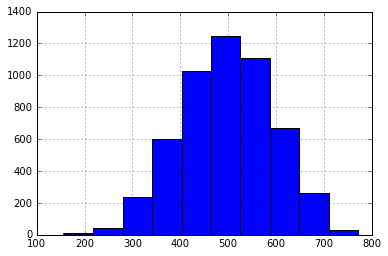

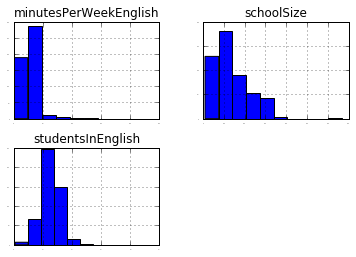

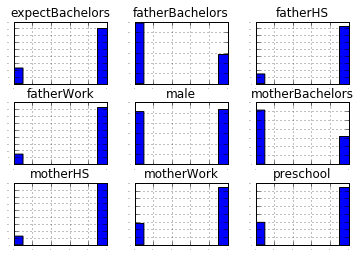

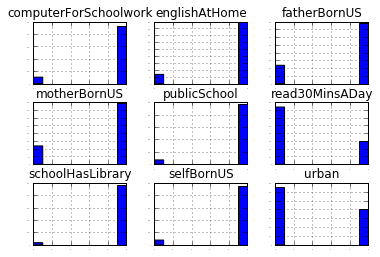

In [247]:
### Unimodal Data Visualizations
allData['readingScore'].hist()
allData[contFeatures].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
allData[binaryFeatures[:9]].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
allData[binaryFeatures[9:]].hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

plt.show()

The target variable **readingScore** has a normal distribution. The variables **schoolSize** and **minutesPerWeekEnglish** shows some skewness.

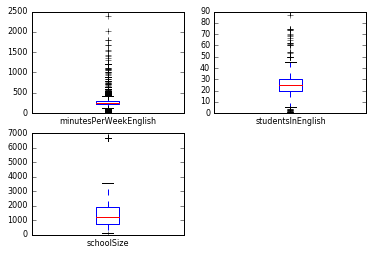

In [248]:
# box and whisker plots
allData[contFeatures].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,
fontsize=8)
plt.show()

The box and whisker plots helps to see the outliers

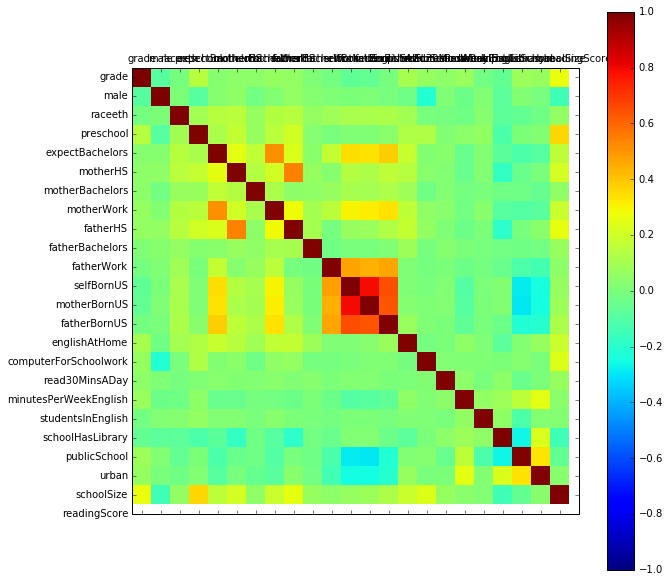

In [249]:
# correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(allData.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,24,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(allData.columns.values)
ax.set_yticklabels(allData.columns.values)

plt.show()

The dark red color shows positive correlations whereas the dark blue color shows negative correlation.

Most correlations observed are:
* 'motherHS' and 'fatherHS'
* 'motherBachelors' and 'fatherBachelors'
* 'motherBornUS' and 'fatherBornUS'
* 'motherBornUS' and 'englishAtHome'
* 'fatherBornUS' and 'englishAtHome'

### Algorithms and Techniques

### Benchmark

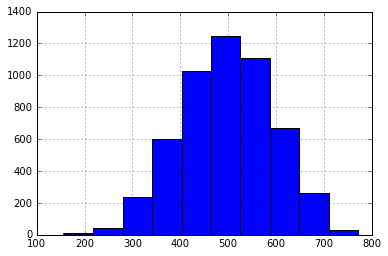

In [250]:
allData['readingScore'].hist()

In [251]:
meanScore = np.mean(pisaTrain.readingScore)
print 'mean score:', meanScore
trainMeanRMSE = np.sqrt(np.mean((meanScore - pisaTrain.readingScore)**2))
print 'train benchmark RMSE using mean:', trainMeanRMSE

mean score: 497.911403221
train benchmark RMSE using mean: 95.5021145158


In [252]:
medianScore = np.median(allData.readingScore)
print 'median score:', medianScore
medianRMSE = np.sqrt(np.mean((allData.readingScore - medianScore)**2))
print 'benchmark RMSE using meadian:', medianRMSE

median score: 499.58
benchmark RMSE using meadian: 95.6104555124


## III. Methodology
(3-5 pages)

### Data Preprocessing

#### Handling missing values

In [253]:
allData.isnull().sum()

grade                      0
male                       0
raceeth                   48
preschool                 77
expectBachelors           85
motherHS                 142
motherBachelors          585
motherWork               129
fatherHS                 370
fatherBachelors          857
fatherWork               346
selfBornUS                93
motherBornUS              94
fatherBornUS             171
englishAtHome             98
computerForSchoolwork     95
read30MinsADay            55
minutesPerWeekEnglish    289
studentsInEnglish        363
schoolHasLibrary         201
publicSchool               0
urban                      0
schoolSize               231
readingScore               0
dtype: int64

In [254]:
# For continuous variables replace the missing data with average of columns
#minutesPerWeekEnglish
#studentsInEnglish
#schoolSize

allData['minutesPerWeekEnglish'].fillna(int(allData['minutesPerWeekEnglish'].mean()), inplace=True)
allData['studentsInEnglish'].fillna(int(allData['studentsInEnglish'].mean()), inplace=True)
allData['schoolSize'].fillna(int(allData['schoolSize'].mean()), inplace=True)

In [255]:
allData['raceeth'].value_counts()

White                                     2894
Hispanic                                  1184
Black                                      635
Asian                                      204
More than one race                         177
American Indian/Alaska Native               51
Native Hawaiian/Other Pacific Islander      40
Name: raceeth, dtype: int64

In [256]:
allData['raceeth'].fillna('White', inplace=True)
# fill every column with its own most frequent value
allData = allData.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [257]:
allData.isnull().sum()

grade                    0
male                     0
raceeth                  0
preschool                0
expectBachelors          0
motherHS                 0
motherBachelors          0
motherWork               0
fatherHS                 0
fatherBachelors          0
fatherWork               0
selfBornUS               0
motherBornUS             0
fatherBornUS             0
englishAtHome            0
computerForSchoolwork    0
read30MinsADay           0
minutesPerWeekEnglish    0
studentsInEnglish        0
schoolHasLibrary         0
publicSchool             0
urban                    0
schoolSize               0
readingScore             0
dtype: int64

#### First model

In [258]:
allData = allData.drop('readingScore', axis=1)
y_train = pisaTrain['readingScore'].values
y_test = pisaTest['readingScore'].values

In [259]:
subset = allData[contFeatures]
X_train = subset.iloc[:pisaTrain.shape[0],:].values

do_cross_validation(X_train, y_train)

LR: 95.320775 (2.140909) r2: 0.000591 (0.010669)
LASSO: 95.321018 (2.137245) r2: 0.000585 (0.010590)
EN: 95.320507 (2.138220) r2: 0.000596 (0.010613)
KNN: 93.033379 (2.539355) r2: 0.047763 (0.031063)
CART: 112.533479 (4.224706) r2: -0.409121 (0.093383)
SVR: 95.185780 (1.937003) r2: 0.003370 (0.005839)


([array([ 96.86681116,  91.7225696 ,  99.26337987,  97.14329749,
          95.82081634,  96.06795686,  95.63919672,  93.06978897,
          94.53908754,  93.07484634]),
  array([ 96.86621906,  91.72248685,  99.25094666,  97.13166844,
          95.81873345,  96.0862667 ,  95.64564133,  93.07144851,
          94.53051364,  93.08625991]),
  array([ 96.86632337,  91.72245901,  99.25405356,  97.13477313,
          95.81919987,  96.07903564,  95.64346768,  93.07087764,
          94.53272382,  93.08215831]),
  array([ 96.63608999,  89.62300658,  94.44542082,  94.54499641,
          97.40736859,  92.96427393,  92.53193944,  90.57347437,
          91.12870486,  90.47851787]),
  array([ 119.49047922,  110.53800647,  116.36610005,  107.11844306,
          119.16118707,  113.10136298,  110.02008157,  110.2408719 ,
          107.45517658,  111.84308407]),
  array([ 96.91453367,  91.78338169,  98.52516387,  95.91185266,
          96.33261697,  96.25426432,  95.30993372,  93.06580276,
          94.55

In [260]:
subset = allData[contFeatures+binaryFeatures]
X_train = subset.iloc[:pisaTrain.shape[0],:].values

do_cross_validation(X_train, y_train)

LR: 82.266996 (1.289424) r2: 0.255115 (0.021557)
LASSO: 82.686933 (1.175312) r2: 0.247596 (0.016341)
EN: 88.154816 (1.658685) r2: 0.145070 (0.010008)
KNN: 92.537131 (2.002172) r2: 0.057779 (0.025820)
CART: 114.113216 (3.440083) r2: -0.422023 (0.118433)
SVR: 95.029719 (1.931375) r2: 0.006635 (0.005659)


([array([ 84.26793554,  80.63907908,  84.33368058,  82.36327422,
          81.34054811,  81.73877293,  83.04769944,  80.31885422,
          82.58027496,  82.03984129]),
  array([ 84.3895413 ,  80.77217287,  84.60523479,  83.10194971,
          82.302664  ,  82.49654354,  83.38952145,  81.26010866,
          82.69102545,  81.86056533]),
  array([ 89.49356589,  85.37944684,  90.93895162,  89.43093665,
          88.42037732,  88.49844156,  89.17876783,  86.27180548,
          87.6881289 ,  86.247737  ]),
  array([ 94.61754416,  88.51014429,  93.74817315,  94.46204884,
          95.34593357,  93.2434786 ,  91.63774793,  91.14498146,
          90.9283231 ,  91.73293127]),
  array([ 109.63923785,  120.24766709,  111.78189435,  115.16177283,
          117.03462067,  112.07128573,  110.98243605,  117.76962365,
          116.1110048 ,  110.33262141]),
  array([ 96.73532089,  91.63295208,  98.34211661,  95.76723399,
          96.18413828,  96.10102992,  95.18615437,  92.92015731,
          94.39

#### Create dummy variables for category fields

In [261]:
temp = pd.get_dummies(allData['raceeth'], 'raceeth')
allData = pd.concat([allData, temp], axis=1)
allData = allData.drop('raceeth', axis=1)

In [265]:

X_train = allData.iloc[:pisaTrain.shape[0],:].values

_ = do_cross_validation(X_train, y_train)

LR: 76.630581 (1.977851) r2: 0.352794 (0.043351)
LASSO: 77.259481 (1.530570) r2: 0.342425 (0.036208)
EN: 84.145353 (1.387755) r2: 0.220856 (0.017844)
KNN: 92.300244 (1.822065) r2: 0.062444 (0.028379)
CART: 107.845256 (3.688387) r2: -0.291261 (0.121993)
SVR: 94.973852 (1.934506) r2: 0.007805 (0.005606)


#### Data transformations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000145F8DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019071828>]], dtype=object)

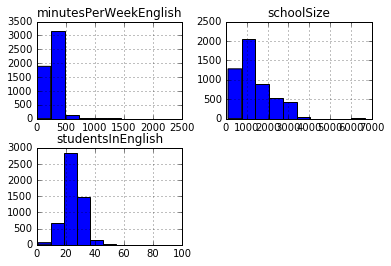

In [263]:
allData[contFeatures].hist()

In [237]:
# log transformations - No improvements
#np.log(allData['schoolSize']).hist()
#allData['schoolSize'] = np.log(allData['schoolSize'])
#np.log1p(allData['minutesPerWeekEnglish']).hist()
#allData['minutesPerWeekEnglish'] = np.log1p(allData['minutesPerWeekEnglish'])

### Implementation

In [270]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 76.632614 (1.976359)
ScaledLASSO: 76.665276 (1.783048)
ScaledEN: 77.810741 (1.381076)
ScaledKNN: 83.944405 (1.158198)
ScaledCART: 107.224323 (3.534628)
ScaledSVR: 83.631208 (1.520350)


#### Ensemble methods

In [273]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 78.556915 (1.712257)
ScaledGBM: 73.849404 (1.663634)
ScaledRF: 81.339322 (1.683551)
ScaledET: 89.355451 (2.558072)


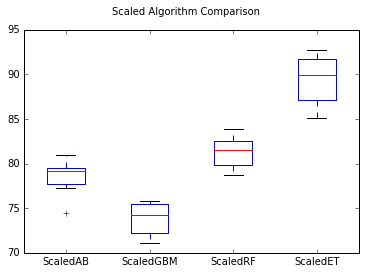

In [274]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

74.5031653788


In [119]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.9589629149446891

### Refinement

In [276]:
from sklearn.model_selection import GridSearchCV
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [278]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -5411.035078 using {'n_estimators': 150}
-5643.057173 (246.481605) with: {'n_estimators': 50}
-5456.642265 (246.207844) with: {'n_estimators': 100}
-5411.035078 (246.818366) with: {'n_estimators': 150}
-5421.718083 (251.228407) with: {'n_estimators': 200}
-5429.752125 (253.638443) with: {'n_estimators': 250}
-5454.192417 (261.012547) with: {'n_estimators': 300}
-5469.757398 (254.138229) with: {'n_estimators': 350}
-5500.226638 (257.899595) with: {'n_estimators': 400}


## IV. Results
(2-3 pages)

### Model Evaluation and Validation

### Justification

In [283]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=150)
model.fit(rescaledX, y_train)

X_test = allData.iloc[pisaTrain.shape[0]:, :]
# transform the validation dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions)**0.5)

74.5031653788


## V. Conclusion
(1-2 pages)

### Free-Form Visualization

### Reflection

### Improvement

### References
[1] Berger, Kathleen. Invitation to The Life Span (second ed.). worth. ISBN 978-1-4641-7205-2.